# Parte 1 <br>
### Projetos de site

Projetos não finalizado - Horas previstas - Preço       ______ para construção de sites

In [1]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados =pd.read_csv(uri)

Renomenado o nome das colunas para facilitar o trabalho

In [2]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)

dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Trabalhar com dados negativos é mais confuso, então podemos trocar os dados/valores<br>
Criando uma nova coluna que receberá a mudança de todos os itens a partir do mapeamento dos itens da coluna de negação 

In [3]:
trocar = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


Para realizar plotagem de gráficos, utilizaremos a biblioteca seaborn(biblioteca baseada no Matplotlib, gera apenas gráficos mais bonitos e elaborados)
<br>
Realizaremos uma plotagem espalhada pelo método "scatterplot"

In [4]:
import seaborn as sns

sns.scatterplot (x="horas_esperadas", y="preco", data=dados)

Percebe-se que quanto mais tempo é esperado para finalização de um projeto, mais caro ele custará

É dado como mais relevante os projetos que foram finalizados, então passando o parâmetro <code>hue</code>, selecionados qual linha colorir

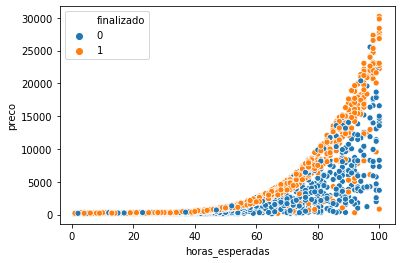

In [5]:
sns.scatterplot (x="horas_esperadas", y="preco",hue="finalizado", data=dados)

Podemos separar os dois elementos também, além de colorir, passando ao invés de <code>hue</code>, o parâmetro <code>col</code>

In [6]:
# sns.scatterplot (x="horas_esperadas", y="preco",hue="finalizado", col="finalizado", data=dados)

Voltando para o treinamento

In [7]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

<code>np.random.seed()</code> Por padrão o seed utilizado pela SKLearning é o do numpy, então se definimos, não precisamos passar ele como prâmetro

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print ("%2.f%%" % acuracia)

47%


c:\users\lucas.azevedo\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Para se saber se a porcetagem é boa, precisamos de uma base para análise, então chutando todos os valores usando a biblioteca numpy gerando apenas '1' <br>
Como se todo mundo chutasse apenas o valor sim para tudo

In [9]:
import numpy as np

previsoes_de_base = np.ones(540) #QUantidade de elementos testados

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100

print ("%2.f%%" % acuracia)

53%


<b>Moral:</b> Vemos que chutando tudo como verdade, temos uma porcetagem de acerto similiar ao do nosso algoritmo, ou seja, ele está péssimo para previsões

# Parte  2

Analisaremos nosso gráfico agora comk base nos nossos testes

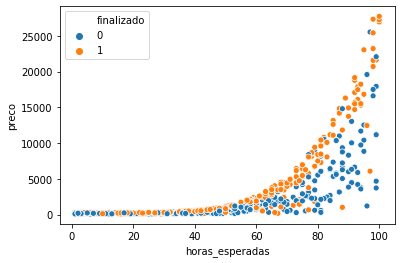

In [10]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

Nosso objetivo é obter uma predição do algoritmo, fazer ele "Deduzir" quais projetos serão viáveis, com o preço proporcional. tendo como base se o projeto foi finalizado

In [11]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

Definimos quais o limites queremos, para utilizar como base para escala do gráfico. Esse limite pode ser defino como um intervalo entre os max e min, definindo um range com a biblioteca do numpy

In [12]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

Por mais que exista os limites, precisamos criar um grid, para que os valores mesclem. Definindo um <code>.meshgrid</code> e depois um <code>.ravel</code> para unir todos os pontos. Por fim uma concatenação entre x e y com <code>.c_</code>.

In [13]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Com os pontos, podemos prever o que ele acha, não esquecendo de redimensionar para 100 x 100 ao invés de 1000

In [14]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

Agora utilizando Matplotlib para plotagem, e jogando os pontos (scatter). Passando o s como parametro de size

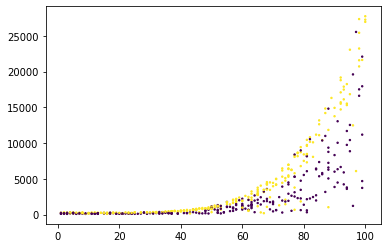

In [15]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

Precisamos saber qual a linha de decisão do algoritmo, para ter uma noção de quão bom ele foi. A linha junto a base indica que ele chutou a maioria 1. Com isso vemos que ele foi horrível (parâmetro alpha altera a cor da linha)

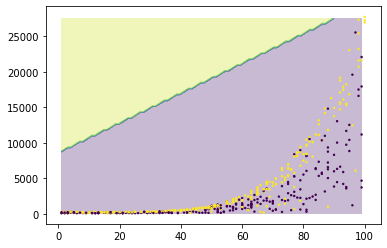

In [16]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

# Utilização de estimadores não lineares

Utilizaremos outros estimadores, além dos lineares. Então deixamos de importar o LineaSVC e utilizamos o SVC

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print ("%2.f%%" % acuracia)

c:\users\lucas.azevedo\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


59%


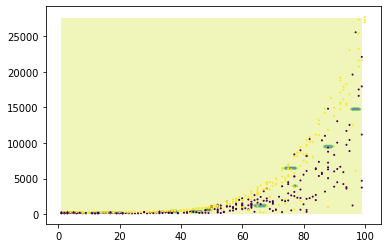

In [20]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

É observado que a plotagem apresenta zonas em verde que indicam que pode ser 1 (deixou de ser linear a predição) <br>
Nosso gráfico não posui escala, então faremos uma reescala dele. <br>
Em nosso código o nosso eixo x é definido pelo "treino_x" e o eixo y é definido pelo "teste_x", então temos que mudar ele<br>
raw == cru == original

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

SEED = 20
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y)

Temos que treinar a nova escala e transforma-la

In [25]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [26]:
modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print ("%2.f%%" % acuracia)

70%


Há um erro na transformação do teste_x em array, então selecionamos o que queremos

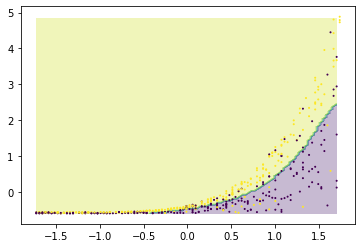

In [29]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)